In [6]:
#for data processing
import pandas as pd
import numpy as np
import string
import re

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#for nlp
from collections import Counter
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#for regression model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Ridge
from sklearn import svm
from sklearn import tree
from sklearn import neighbors
from sklearn import metrics

#for evaluation
import scipy

In [7]:
anger_train=pd.read_csv("anger_train.csv")
fear_train=pd.read_csv("fear_train.csv")
joy_train=pd.read_csv("joy_train.csv")
sad_train=pd.read_csv("sadness_train.csv")


In [9]:
anger_train.head()

,id,text,label,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [10]:
fear_train.head()

,id,text,label,intensity
0,20000,I feel like I am drowning. #depression #anxiet...,fear,0.979
1,20001,I get so nervous even thinking about talking t...,fear,0.979
2,20002,I lost my blinders .... #panic,fear,0.975
3,20003,I feel like I am drowning. #depression #falur...,fear,0.938
4,20004,This is the scariest American Horror Story out...,fear,0.938


In [11]:
joy_train.head()

,id,text,label,intensity
0,30000,Just got back from seeing @GaryDelaney in Burs...,joy,0.980
1,30001,Oh dear an evening of absolute hilarity I don'...,joy,0.958
2,30002,Been waiting all week for this game ❤️❤️❤️ #ch...,joy,0.940
3,30003,"@gardiner_love : Thank you so much, Gloria! Yo...",joy,0.938
4,30004,I feel so blessed to work with the family that...,joy,0.938


In [12]:
sad_train.head()

,id,text,label,intensity
0,40000,Depression sucks! #depression,sadness,0.958
1,40001,Feeling worthless as always #depression,sadness,0.958
2,40002,Feeling worthless as always,sadness,0.958
3,40003,My #Fibromyalgia has been really bad lately wh...,sadness,0.946
4,40004,Im think ima lay in bed all day and sulk. Life...,sadness,0.934


In [13]:
#see ratio of total instance of each emotion
frames = [anger_train, fear_train, sad_train, joy_train]
data_training = pd.concat(frames)
data_training.reset_index(inplace=True)
data_training.label.value_counts()

fear       1147
anger       857
joy         823
sadness     786
Name: label, dtype: int64

In [14]:
data_training.head()

,index,id,text,label,intensity
0,0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [15]:
data_training.tail()

,index,id,text,label,intensity
3608,818,30818,It's just the lack of company and liveliness o...,joy,0.058
3609,819,30819,Quinn's short hair makes me sad. #glee,joy,0.040
3610,820,30820,hate overthinking e v e r y t h i n g like i j...,joy,0.040
3611,821,30821,People who cheer for sports teams completely o...,joy,0.020
3612,822,30822,@DamnPatriot You're a POS for rejoicing in som...,joy,0.019


In [16]:
#adding word_count, char_count, and punc_count feature
punc = string.punctuation
data_training['word_count'] = data_training['text'].apply(lambda x:len(x.split()))
data_training['char_count'] = data_training['text'].apply(lambda x:len(x.replace(' ','')))
data_training['punc_count'] = data_training['text'].apply(lambda x:len([a for a in x if a in punc]))
data_training.head()

,index,id,text,label,intensity,word_count,char_count,punc_count
0,0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938,18,79,12
1,1,10001,So my Indian Uber driver just called someone t...,anger,0.896,23,97,4
2,2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896,19,90,4
3,3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896,24,111,13
4,4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896,24,102,6


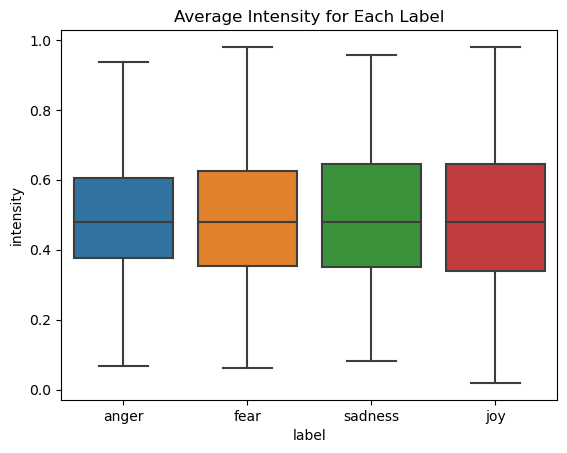

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data_training contains your data
# and has columns 'label' and 'intensity'

colors = ['red', 'black', 'lightblue', 'yellow']
bplot = sns.boxplot(data=data_training, x='label', y='intensity')

# Zip the artists and colors together for iteration
for artist, color in zip(bplot.artists, colors):
    artist.set_facecolor(color)

plt.title('Average Intensity for Each Label')
plt.show()


Text(0.5, 1.08, 'Relationship between char_count and intensity')

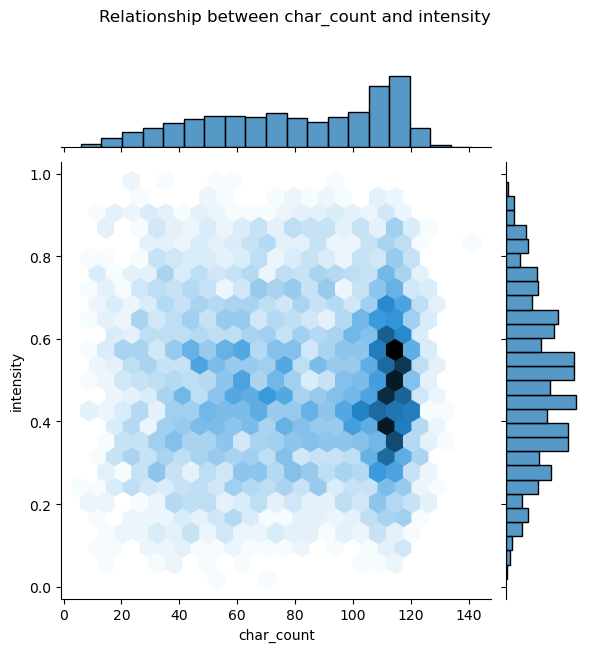

In [19]:
#See the relationship between intensity and character, word, and, punctuation counts
sns.jointplot(data=data_training, x='char_count', y='intensity', kind='hex')
plt.suptitle('Relationship between char_count and intensity', y=1.08)

Text(0.5, 1.08, 'Relationship between word_count and intensity')

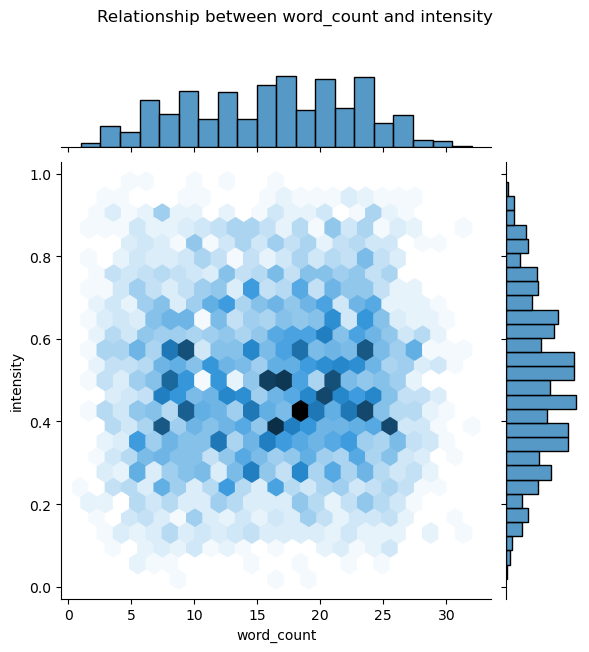

In [20]:
sns.jointplot(data=data_training, x='word_count', y='intensity', kind='hex')
plt.suptitle('Relationship between word_count and intensity', y=1.08)

Text(0.5, 1.08, 'Relationship between punct_count and intensity')

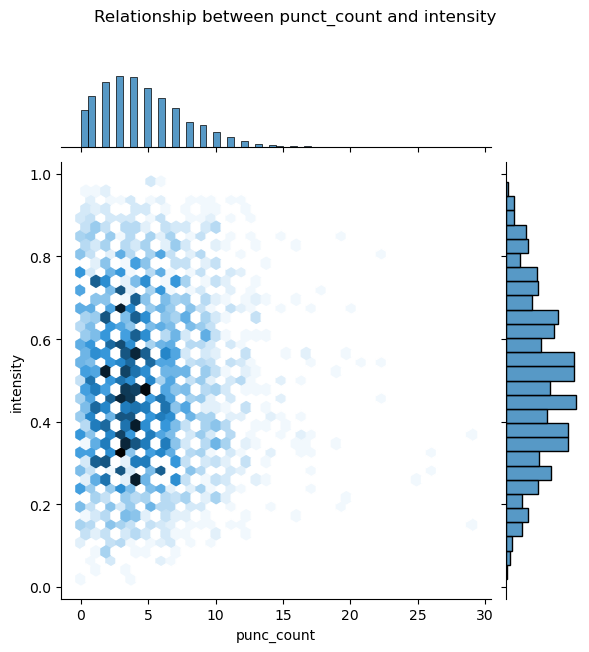

In [21]:
sns.jointplot(data=data_training, x='punc_count', y='intensity', kind='hex')
plt.suptitle('Relationship between punct_count and intensity', y=1.08)

In [22]:
#Join text in each emotion
join_text_fear = ' '.join(data_training[data_training['label']=='fear']['text'].values)
join_text_anger = ' '.join(data_training[data_training['label']=='anger']['text'].values)
join_text_joy = ' '.join(data_training[data_training['label']=='joy']['text'].values)
join_text_sadness = ' '.join(data_training[data_training['label']=='sadness']['text'].values)

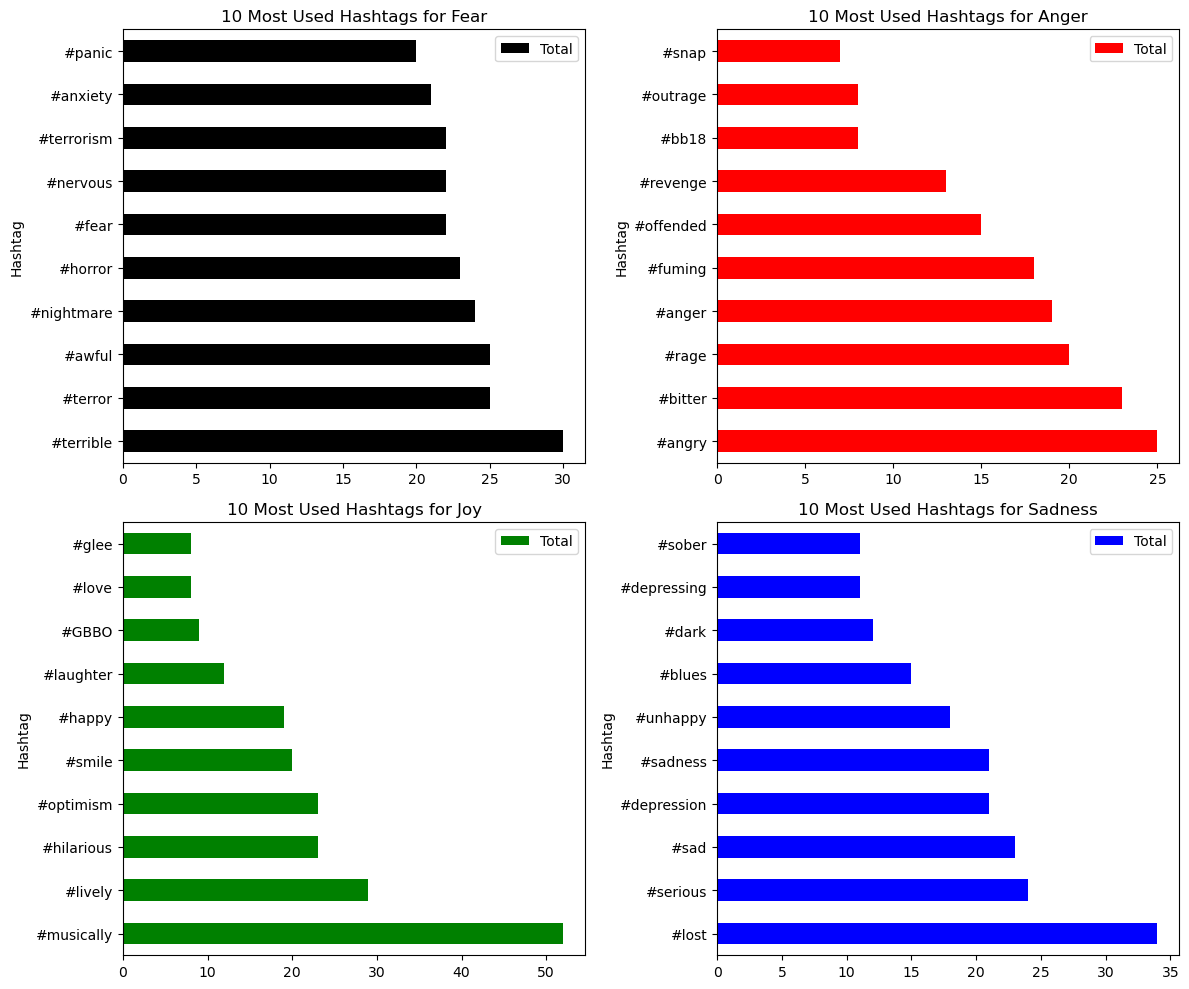

In [24]:

def plot_top_hashtags(emotion_text, color, title, ax):
    hashtag_counter = Counter(word for word in emotion_text.split(' ') if word != '' and word[0]=='#')
    most_common = hashtag_counter.most_common(10)
    df = pd.DataFrame(most_common, columns=["Hashtag", "Total"])
    df.plot.barh(y="Total", x="Hashtag", ax=ax, color=color, title=title)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
axes = [ax1, ax2, ax3, ax4]
emotions = [join_text_fear, join_text_anger, join_text_joy, join_text_sadness]
colors = ["black", "red", "green", "blue"]
titles = ["Fear", "Anger", "Joy", "Sadness"]

for ax, emotion, color, title in zip(axes, emotions, colors, titles):
    plot_top_hashtags(emotion, color, f"10 Most Used Hashtags for {title}", ax)

plt.tight_layout()
plt.show()

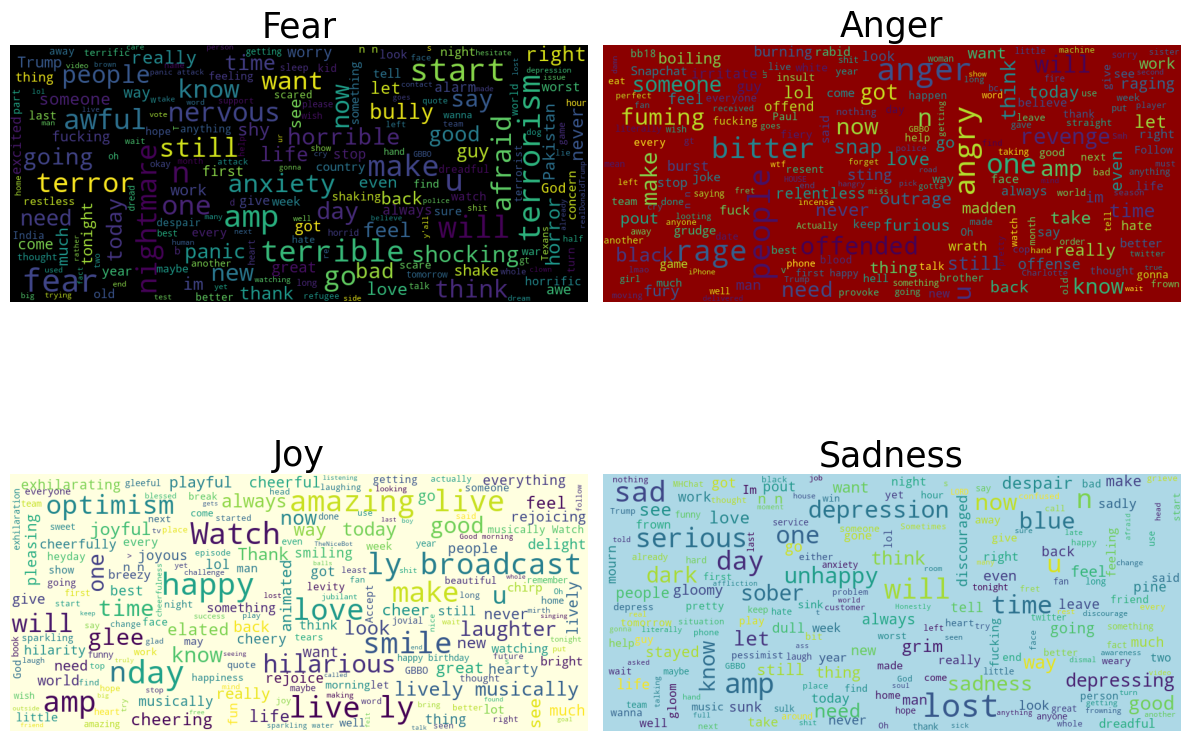

In [25]:
def create_wordcloud(emotion_text, background_color, title, ax):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(max_font_size=50, background_color=background_color, stopwords=stopwords, width=900, height=400).generate(emotion_text)
    ax.imshow(wordcloud)
    ax.set_title(title, size=25)
    ax.axis('off')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
axes = [ax1, ax2, ax3, ax4]
emotions = [join_text_fear, join_text_anger, join_text_joy, join_text_sadness]
colors = ['black', 'darkred', 'lightyellow', 'lightblue']
titles = ['Fear', 'Anger', 'Joy', 'Sadness']

for ax, emotion, color, title in zip(axes, emotions, colors, titles):
    create_wordcloud(emotion, color, title, ax)

plt.tight_layout()
plt.show()

## Training

In [26]:
#Cleaning text by removing links, numbers, @, stopwords, and transform all to lower case
from nltk.corpus import stopwords

tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[A-Za-z0-9./]+'
pat3 = r'[0-9]+'
combined_pat = r'|'.join((pat1, pat2, pat3))
stop_words= set(stopwords.words('english'))

def tweet_cleaner(data_frame):
    print('Cleaning and parsing the tweets.....\n')
    clean_data = []
    for index, row in data_frame.iterrows():
        stripped = re.sub(combined_pat, '', row.text)
        lower_case = stripped.lower()
        words = tok.tokenize(lower_case)
        filtered_words = [w for w in words if not w in stop_words]
        clean_data.append((' '.join(filtered_words)).strip())
        
    print('Done!')
    return clean_data

In [27]:
clean_data_training_list = tweet_cleaner(data_training)

Cleaning and parsing the tweets.....

Done!


In [28]:
data_training.text = pd.DataFrame(clean_data_training_list)
data_training.head()


,index,id,text,label,intensity,word_count,char_count,punc_count
0,0,10000,fu * k ! heck ! moved fridge !... knock landlo...,anger,0.938,18,79,12
1,1,10001,indian uber driver called someone n word . ' m...,anger,0.896,23,97,4
2,2,10002,asked parcel delivered pick store address # fu...,anger,0.896,19,90,4
3,3,10003,ef whichever butt wipe pulled fire alarm davis...,anger,0.896,24,111,13
4,4,10004,"' join put phone , talk rude . taking money ac...",anger,0.896,24,102,6


In [29]:
#making one-hot encoding of label
labels = pd.get_dummies(data_training['label'])

#applying bag of words and tf-idf technique to vectorise the tweets
vectorizer = CountVectorizer(max_features=1000, ngram_range=(1, 3))
X_BoW = vectorizer.fit_transform(data_training.text)
X_BoW = pd.DataFrame.sparse.from_spmatrix(X_BoW).join(labels)

vectorizer_tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer_tfidf.fit_transform(data_training.text)
X_tfidf = pd.DataFrame.sparse.from_spmatrix(X_tfidf).join(labels)

In [32]:
from scipy.sparse import csr_matrix

# Convert sparse DataFrame columns to sparse matrices
X_BoW_sparse = csr_matrix(X_BoW.values)
X_tfidf_sparse = csr_matrix(X_tfidf.values)

# Now you can train the regression models
# Linear Regression
BoW_linreg = LinearRegression().fit(X_BoW_sparse, data_training['intensity'])
tfidf_linreg = LinearRegression().fit(X_tfidf_sparse, data_training['intensity'])
# Ridge Regression
BoW_ridge = Ridge().fit(X_BoW_sparse, data_training['intensity'])
tfidf_ridge = Ridge().fit(X_tfidf_sparse, data_training['intensity'])
# Knn Regression
n_neighbors=5
BoW_knn = neighbors.KNeighborsRegressor(n_neighbors, weights='uniform').fit(X_BoW_sparse, data_training['intensity'])
tfidf_knn = neighbors.KNeighborsRegressor(n_neighbors, weights='uniform').fit(X_tfidf_sparse, data_training['intensity'])
# Decision Tree Regression
BoW_tree = tree.DecisionTreeRegressor(max_depth=1).fit(X_BoW_sparse, data_training['intensity'])
tfidf_tree = tree.DecisionTreeRegressor(max_depth=1).fit(X_tfidf_sparse, data_training['intensity'])
# Support Vector Regression
BoW_svr = svm.SVR().fit(X_BoW_sparse, data_training['intensity'])
tfidf_svr = svm.SVR().fit(X_tfidf_sparse, data_training['intensity'])


In [35]:
anger_dev=pd.read_csv("anger_development.csv")
fear_dev=pd.read_csv("fear_development.csv")
joy_dev=pd.read_csv("joy_development.csv")
sad_dev=pd.read_csv("sadness_development.csv")

In [36]:
joy_dev.head()

,id,text,label,intensity
0,30823,"@theclobra lol I thought maybe, couldn't decid...",joy,0.312
1,30824,Nawaz Sharif is getting more funnier than @kap...,joy,0.700
2,30825,Nawaz Sharif is getting more funnier than @kap...,joy,0.580
3,30826,@tomderivan73 😁...I'll just people watch and e...,joy,0.438
4,30827,I love my family so much #lucky #grateful #sma...,joy,0.936


In [37]:
frames = [anger_dev, fear_dev, sad_dev, joy_dev]
data_dev = pd.concat(frames)
data_dev.reset_index(inplace=True)
data_dev.label.value_counts()

fear       110
anger       84
joy         79
sadness     74
Name: label, dtype: int64

In [38]:
clean_data_dev_list = tweet_cleaner(data_dev)

Cleaning and parsing the tweets.....

Done!


In [39]:
data_dev.text = pd.DataFrame(clean_data_dev_list)
data_dev.head()

,index,id,text,label,intensity
0,0,10857,pls dont insult word ' molna ',anger,0.479
1,1,10858,would almost took offense actually snapped,anger,0.458
2,2,10859,rutgers game abomination . affront god man . m...,anger,0.562
3,3,10860,"' lisa asked started raging , ' call ?' heh",anger,0.500
4,4,10861,sometimes get mad something minuscule try ruin...,anger,0.708


In [43]:
labels = pd.get_dummies(data_dev['label'])

X_Dev_BoW = vectorizer.transform(data_dev['text'])
X_Dev_BoW = pd.DataFrame.sparse.from_spmatrix(X_Dev_BoW).join(labels)

X_Dev_tfidf = vectorizer_tfidf.transform(data_dev['text'])
X_Dev_tfidf = pd.DataFrame.sparse.from_spmatrix(X_Dev_tfidf).join(labels)

X_Dev_BoW.columns = X_Dev_BoW.columns.astype(str)
X_Dev_tfidf.columns = X_Dev_tfidf.columns.astype(str)

In [44]:
#define function to get the scores
def get_score(y_test, y_pred, name):
    print(name + '\n')
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('-------------------------------------------------------------------------------')

In [46]:
get_score(data_dev['intensity'], BoW_linreg.predict(X_Dev_BoW), "BoW-Linear Regression")
get_score(data_dev['intensity'], tfidf_linreg.predict(X_Dev_tfidf), "Tfidf-Linear Regression")

get_score(data_dev['intensity'], BoW_ridge.predict(X_Dev_BoW), "BoW-Ridge Regression")
get_score(data_dev['intensity'], tfidf_ridge.predict(X_Dev_tfidf), "Tfidf-Ridge Regression")

get_score(data_dev['intensity'], BoW_knn.predict(X_Dev_BoW), "BoW-Knn Regression")
get_score(data_dev['intensity'], tfidf_knn.predict(X_Dev_tfidf), "Tfidf-Knn Regression")

get_score(data_dev['intensity'], BoW_tree.predict(X_Dev_BoW), "BoW-Decision Tree Regression")
get_score(data_dev['intensity'], tfidf_tree.predict(X_Dev_tfidf), "Tfidf-Decision Tree Regression")

get_score(data_dev['intensity'], BoW_svr.predict(X_Dev_BoW), "BoW-SVR")
get_score(data_dev['intensity'], tfidf_svr.predict(X_Dev_tfidf), "Tfidf-SVR")


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse colu

BoW-Linear Regression

Mean Absolute Error: 0.1503413632356558
Mean Squared Error: 0.03681677253469362
Root Mean Squared Error: 0.19187697239297274
-------------------------------------------------------------------------------
Tfidf-Linear Regression

Mean Absolute Error: 0.15139985376552187
Mean Squared Error: 0.03668712804798232
Root Mean Squared Error: 0.1915388421390876
-------------------------------------------------------------------------------
BoW-Ridge Regression

Mean Absolute Error: 0.1418976496167341
Mean Squared Error: 0.03257681227992754
Root Mean Squared Error: 0.18049047697850307
-------------------------------------------------------------------------------
Tfidf-Ridge Regression

Mean Absolute Error: 0.13495181713426035
Mean Squared Error: 0.02938874016817618
Root Mean Squared Error: 0.17143144451405692
-------------------------------------------------------------------------------
BoW-Knn Regression

Mean Absolute Error: 0.15012910662824208
Mean Squared Error: 0.03

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with spa

In [47]:
#SVR model with tf-idf vectorisation produce the smallest error, so it is chosen as the final model
y_actual = data_dev['intensity']
y_predicted = tfidf_svr.predict(X_Dev_tfidf)

pd.DataFrame(data={"Actual Intensity" : data_dev['intensity'], "Predicted Intensity" : tfidf_svr.predict(X_Dev_tfidf)})

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


,Actual Intensity,Predicted Intensity
0,0.479,0.492791
1,0.458,0.386838
2,0.562,0.492455
3,0.500,0.598758
4,0.708,0.531764
...,...,...
342,0.580,0.499381
343,0.170,0.458617
344,0.396,0.320307
345,0.156,0.340903


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted Intensity')

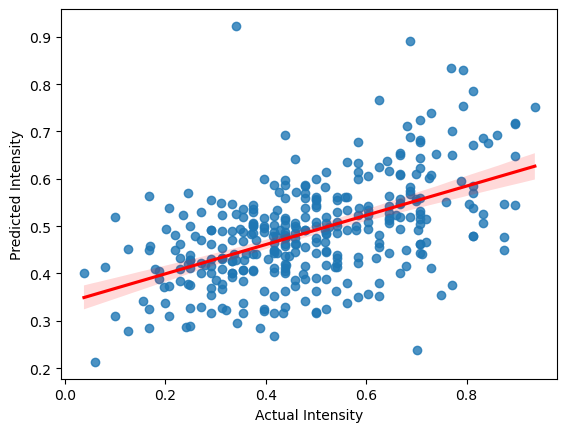

In [48]:
#Plotting distribution of actual intensity to the predicted intensity
sns.regplot(y_actual, y_predicted, line_kws={'color':'red'})
plt.xlabel("Actual Intensity")
plt.ylabel("Predicted Intensity")

In [49]:
#Training the final model with the combination of training and development data
combined_training = pd.concat([data_training[['id', 'text', 'label', 'intensity']], data_dev]).reset_index()
combined_training.shape

(3960, 6)

In [50]:
#making a separate model for each emotion

#ANGER
anger = combined_training.loc[combined_training['label']=='anger']
anger_vectorizer = TfidfVectorizer(max_features=1000)
X_anger = anger_vectorizer.fit_transform(anger['text'])
anger_model = svm.SVR().fit(X_anger, anger['intensity'])

#FEAR
fear = combined_training.loc[combined_training['label']=='fear']
fear_vectorizer = TfidfVectorizer(max_features=1000)
X_fear = fear_vectorizer.fit_transform(fear['text'])
fear_model = svm.SVR().fit(X_fear, fear['intensity'])

#SADNESS
sad = combined_training.loc[combined_training['label']=='sadness']
sad_vectorizer = TfidfVectorizer(max_features=1000)
X_sad = sad_vectorizer.fit_transform(sad['text'])
sad_model = svm.SVR().fit(X_sad, sad['intensity'])

#JOY
joy = combined_training.loc[combined_training['label']=='joy']
joy_vectorizer = TfidfVectorizer(max_features=1000)
X_joy = joy_vectorizer.fit_transform(joy['text'])
joy_model = svm.SVR().fit(X_joy, joy['intensity'])

## Testing

In [51]:
anger_test=pd.read_csv("anger_test.csv")
fear_test=pd.read_csv("fear_test.csv")
joy_test=pd.read_csv("joy_test.csv")
sad_test=pd.read_csv("sadness_test.csv")

In [52]:
anger_test.head()

,id,text,label,intensity
0,10941,At the point today where if someone says somet...,anger,0.319
1,10942,@CorningFootball IT'S GAME DAY!!!! T MIN...,anger,0.144
2,10943,This game has pissed me off more than any othe...,anger,0.898
3,10944,@spamvicious I've just found out it's Candice ...,anger,0.271
4,10945,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.646


In [53]:
#cleaning the test data
anger_text = tweet_cleaner(anger_test)
fear_text = tweet_cleaner(fear_test)
sad_text = tweet_cleaner(sad_test)
joy_text = tweet_cleaner(joy_test)

Cleaning and parsing the tweets.....

Done!
Cleaning and parsing the tweets.....

Done!
Cleaning and parsing the tweets.....

Done!
Cleaning and parsing the tweets.....

Done!


In [54]:
#making prediction using the final model

#ANGER
X_anger_test = anger_vectorizer.transform(anger_text)
Y_anger_actual = anger_test['intensity']
Y_anger_predicted = anger_model.predict(X_anger_test)

#FEAR
X_fear_test = fear_vectorizer.transform(fear_text)
Y_fear_actual = fear_test['intensity']
Y_fear_predicted = fear_model.predict(X_fear_test)

#SADNESS
X_sad_test = sad_vectorizer.transform(sad_text)
Y_sad_actual = sad_test['intensity']
Y_sad_predicted = sad_model.predict(X_sad_test)

#JOY
X_joy_test = joy_vectorizer.transform(joy_text)
Y_joy_actual = joy_test['intensity']
Y_joy_predicted = joy_model.predict(X_joy_test)

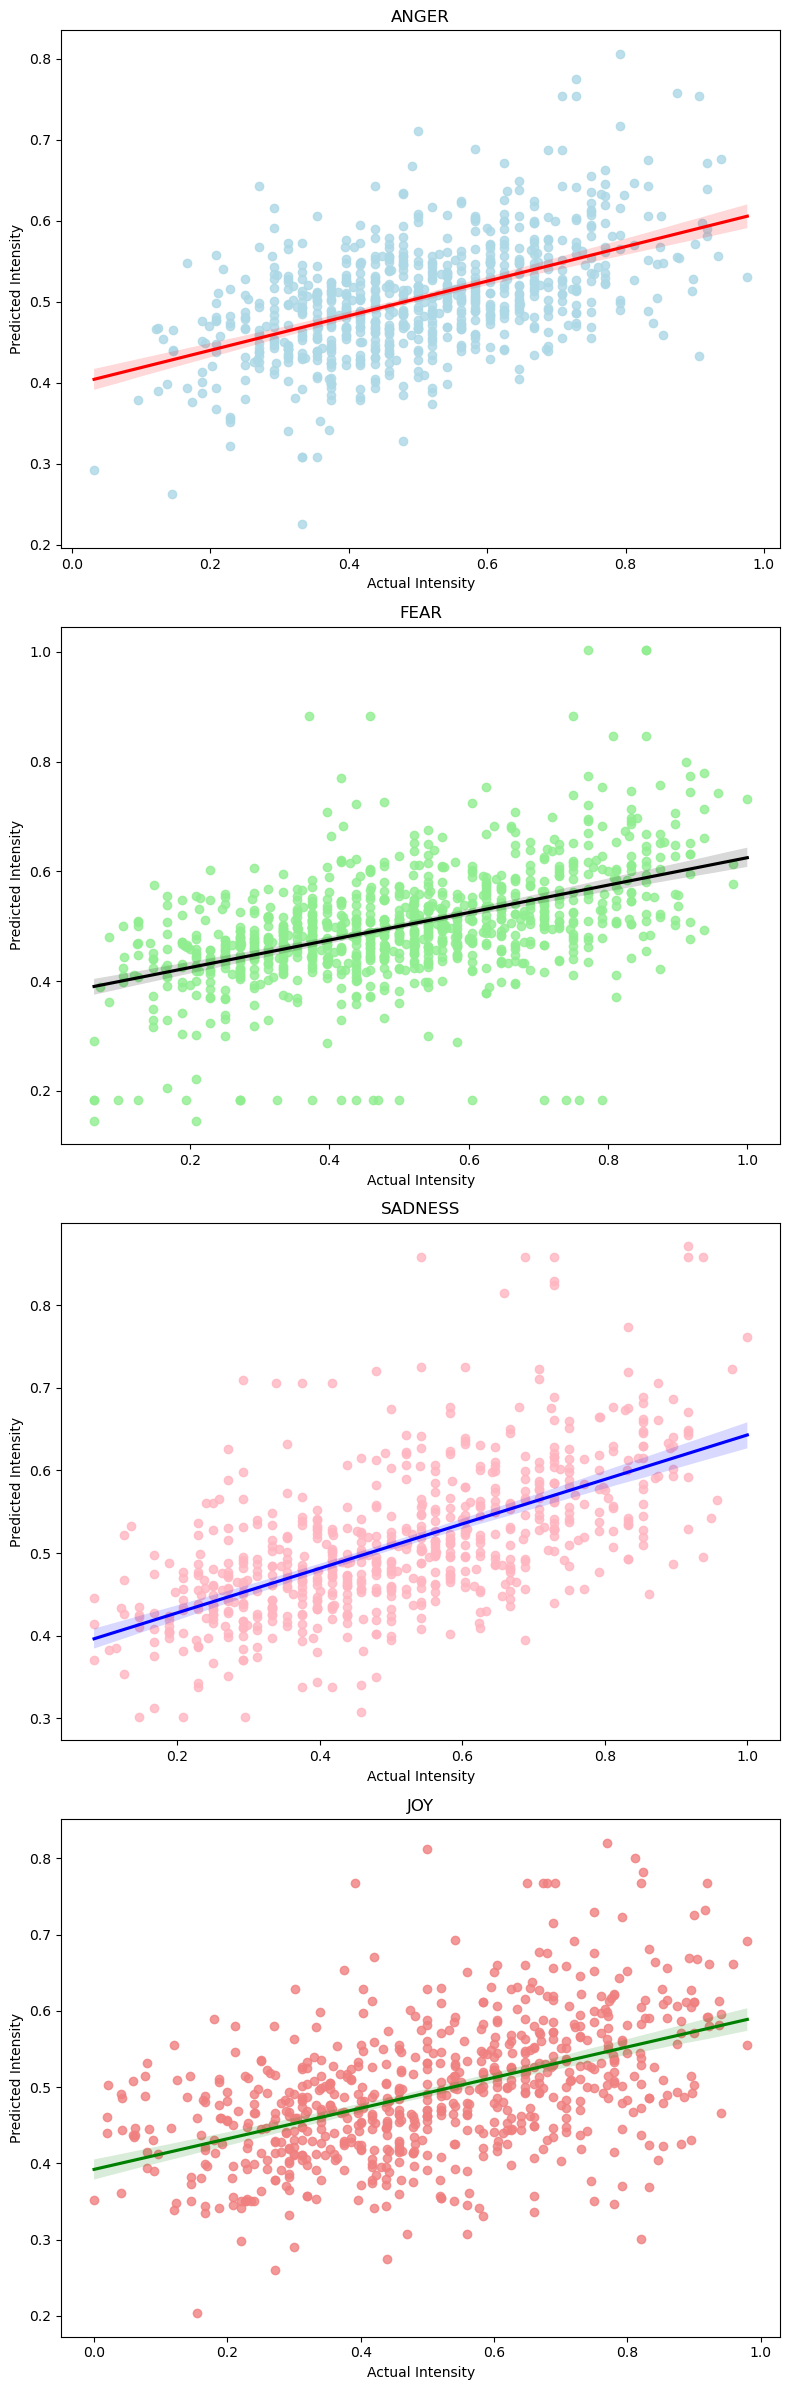

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the actual and predicted values for each emotion
actual_values = [Y_anger_actual, Y_fear_actual, Y_sad_actual, Y_joy_actual]
predicted_values = [Y_anger_predicted, Y_fear_predicted, Y_sad_predicted, Y_joy_predicted]
emotions = ['ANGER', 'FEAR', 'SADNESS', 'JOY']
line_colors = ['red', 'black', 'blue', 'green']
scatter_colors = ['lightblue', 'lightgreen', 'lightpink', 'lightcoral']

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(8, 24))

# Loop through each emotion and plot the regression
for ax, actual, predicted, emotion, line_color, scatter_color in zip(axes, actual_values, predicted_values, emotions, line_colors, scatter_colors):
    sns.regplot(actual, predicted, ax=ax, line_kws={'color': line_color}, scatter_kws={"color": scatter_color})
    ax.set_xlabel("Actual Intensity")
    ax.set_ylabel("Predicted Intensity")
    ax.set_title(emotion)

plt.tight_layout()
plt.show()


In [58]:
get_score(Y_anger_actual, Y_anger_predicted, "Result of Anger Model")
get_score(Y_fear_actual, Y_fear_predicted, "Result of Fear Model")
get_score(Y_sad_actual, Y_sad_predicted, "Result of Sadness Model")
get_score(Y_joy_actual, Y_joy_predicted, "Result of Joy Model")

Result of Anger Model

Mean Absolute Error: 0.11944444363659819
Mean Squared Error: 0.021801897590082074
Root Mean Squared Error: 0.1476546565133727
-------------------------------------------------------------------------------
Result of Fear Model

Mean Absolute Error: 0.1422758227694366
Mean Squared Error: 0.030413849340252586
Root Mean Squared Error: 0.1743956689263027
-------------------------------------------------------------------------------
Result of Sadness Model

Mean Absolute Error: 0.13576028784385233
Mean Squared Error: 0.026921389690413543
Root Mean Squared Error: 0.16407738933324587
-------------------------------------------------------------------------------
Result of Joy Model

Mean Absolute Error: 0.1558303602115769
Mean Squared Error: 0.03639827722575838
Root Mean Squared Error: 0.19078332533468007
-------------------------------------------------------------------------------


## Evaluation

In [59]:
#Using the official evalution function
def evaluate(pred,gold):

    # lists storing gold and prediction scores
    gold_scores=[]  
    pred_scores=[]

    # lists storing gold and prediction scores where gold score >= 0.5
    gold_scores_range_05_1=[]
    pred_scores_range_05_1=[]
        
    for p in pred:
        pred_scores.append(p)
        
    for g in gold:
        gold_scores.append(g)

    for i in range(len(gold_scores)):
        if gold_scores[i] >= 0.5:
            gold_scores_range_05_1.append(gold_scores[i])
            pred_scores_range_05_1.append(pred_scores[i])

    
    # return zero correlation if predictions are constant
    if np.std(pred_scores)==0 or np.std(gold_scores)==0:
        return (0,0,0,0)
    

    pears_corr=scipy.stats.pearsonr(pred_scores,gold_scores)[0]                                     
    pears_corr_range_05_1=scipy.stats.pearsonr(pred_scores_range_05_1,gold_scores_range_05_1)[0]                                           
    
    
    return (pears_corr,pears_corr_range_05_1)

In [60]:
pear_results=[]
spear_results=[]

pear_results_range_05_1=[]
spear_results_range_05_1=[]

num_pairs = 4
argv = ["Anger_Actual", Y_anger_actual, "Anger_Predicted", Y_anger_predicted, "Fear_Actual", Y_fear_actual, "Fear_Predicted", Y_fear_predicted, "Sad_Actual", Y_sad_actual, "Sad_Predicted", Y_sad_predicted, "Joy_Actual", Y_joy_actual, "Joy_Predicted", Y_joy_predicted]

for i in range(0,num_pairs*4,4):
    name_gold = argv[i]
    gold=argv[i+1]
    name_pred = argv[i+2]
    pred=argv[i+3]       
    result=evaluate(pred,gold)
    
    print ("Pearson correlation between ", name_pred, " and ", name_gold, ":\t", str(result[0]))        
    pear_results.append(result[0])


    print ("Pearson correlation for gold scores in range 0.5-1 between ",name_pred," and ",name_gold,":\t",str(result[1]))       
    pear_results_range_05_1.append(result[1])


avg_pear=np.mean(pear_results)

avg_pear_range_05_1=np.mean(pear_results_range_05_1)

print ("Average Pearson correlation:\t",str(avg_pear))

print ("Average Pearson correlation for gold scores in range 0.5-1:\t", str(avg_pear_range_05_1))

Pearson correlation between  Anger_Predicted  and  Anger_Actual :	 0.5245387009556718
Pearson correlation for gold scores in range 0.5-1 between  Anger_Predicted  and  Anger_Actual :	 0.39814437099449007
Pearson correlation between  Fear_Predicted  and  Fear_Actual :	 0.49612801256752515
Pearson correlation for gold scores in range 0.5-1 between  Fear_Predicted  and  Fear_Actual :	 0.3982683296098737
Pearson correlation between  Sad_Predicted  and  Sad_Actual :	 0.6108693791668371
Pearson correlation for gold scores in range 0.5-1 between  Sad_Predicted  and  Sad_Actual :	 0.44059772433058886
Pearson correlation between  Joy_Predicted  and  Joy_Actual :	 0.48863783360142754
Pearson correlation for gold scores in range 0.5-1 between  Joy_Predicted  and  Joy_Actual :	 0.29808400647124833
Average Pearson correlation:	 0.5300434815728654
Average Pearson correlation for gold scores in range 0.5-1:	 0.38377360785155024
